# High Note EDA

The “freemium” business model is widely used by online services such as LinkedIn, Match.com, Dropbox, and music-listening sites like Spotify. It divides user populations into groups that use the service for free and groups that pay a fee for additional features. Key points related to the freemium model: 
- Free accounts are monetized using online advertising
- Premium subscribers (those paying a fee) are typically 24 times more profitable than free users
- However, premium subscribers are rare 

Some background about the Company:
High Note is an anonymized real music streaming company - similar to Last.fm, Spotify or Pandora that uses a freemium business model. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import math
from matplotlib.ticker import MaxNLocator
import csv
import scipy

In [2]:
data = pd.read_csv(r"C:\Users\Tatiksha\Documents\Customer Social Analytics\Midterm\HighNoteDataMidterm.csv")
data.head()

,ID,age,male,friend_cnt,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songsListened,lovedTracks,posts,playlists,shouts,adopter,tenure,good_country
0,1,22,0,8,22.571429,0.428571,1,0,9687,194,0,1,8,0,59,1
1,2,35,0,2,28.000000,1.000000,2,0,0,0,0,0,0,0,35,0
2,3,27,1,2,23.000000,1.000000,1,0,508,0,0,1,2,0,42,0
3,4,21,0,28,22.947368,0.500000,7,1,1357,32,0,0,1,0,25,0
4,5,24,0,65,22.283019,0.913793,9,0,89984,20,2,0,81,0,67,0


High Note's customer dataset includes some of the following that should be valuable to this analysis:  
- Demographic characteristics such as age, gender and country
- Social network characteristics such as number of friends a user has on the network
- Engagement level data on activities performed when using the service, which include the number of songs the user has listened to, playlists created, “shouts” sent to friends, etc.

Data Dictionary:
- age = at the beginning of the CURRENT period
- male=  if 1 then male else female
- friend_cnt = number of friends
- avg_friend_age = avg age of friends
- avg_friend_male = avg age of friends that are male
- friend_country_cnt = number of different countries this user's friends are from (how diverse the person is globally)
- subscriber_friend_cnt = number of friends who are premium
- songsListened = cumulative number of songs listened till the beginning of the current period
- lovedTracks = number of tracks loved at the start of CURRENT period
- posts = number of Q&A forum posts made at the start of CURRENT period
- playlists = number of playlists made till the current period
- shouts = number of shouts received from other users till the current period
- adopter = 1 if the user switched from being FREE to PREMIUM  subscriber in CURRENT period (never been premium before)
- tenure = how long has the user been on the site (in months)
- good_country = 1 if from US, UK or Germany, otherwise rest of the world

*Checking data type and if any columns have NaN values*

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43827 entries, 0 to 43826
Data columns (total 16 columns):
ID                       43827 non-null int64
age                      43827 non-null int64
male                     43827 non-null int64
friend_cnt               43827 non-null int64
avg_friend_age           43827 non-null float64
avg_friend_male          43827 non-null float64
friend_country_cnt       43827 non-null int64
subscriber_friend_cnt    43827 non-null int64
songsListened            43827 non-null int64
lovedTracks              43827 non-null int64
posts                    43827 non-null int64
playlists                43827 non-null int64
shouts                   43827 non-null int64
adopter                  43827 non-null int64
tenure                   43827 non-null int64
good_country             43827 non-null int64
dtypes: float64(2), int64(14)
memory usage: 5.4 MB


In [6]:
data.isnull().any()

ID                       False
age                      False
male                     False
friend_cnt               False
avg_friend_age           False
avg_friend_male          False
friend_country_cnt       False
subscriber_friend_cnt    False
songsListened            False
lovedTracks              False
posts                    False
playlists                False
shouts                   False
adopter                  False
tenure                   False
good_country             False
dtype: bool

No null values are in the dataset and all the data types are either an integer or float, so we can move onto our analysis

# Summary Statistics
Tasks to do:
- Generating descriptive statistics for key variables in the data set
- Analyzing the differences in mean values of the variables (comparing the adopter and non-adapter subsamples)
- Drawing tentative conclusions from these comparisons

In [9]:
#Only getting descriptive stats for relevant columns
#Excluded ID, Male, Avg Friend Age, Avg Friend Age Male, Adopter, Good Country since they were binary or already averaged
data2 = data.iloc[:,[1,3,6,7,8,9,10,11,12,14]] 
data2_stat= data2.describe()
data2_stat.round(2) #rounding to 2 decimal places

,age,friend_cnt,friend_country_cnt,subscriber_friend_cnt,songsListened,lovedTracks,posts,playlists,shouts,tenure
count,43827.00,43827.00,43827.00,43827.00,43827.00,43827.00,43827.00,43827.00,43827.00,43827.00
mean,24.11,20.20,4.22,0.52,18890.62,101.11,6.57,0.58,35.56,43.95
std,6.43,64.64,6.14,2.87,30244.38,292.65,118.27,1.26,358.84,19.82
min,8.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,20.00,3.00,1.00,0.00,1470.50,1.00,0.00,0.00,1.00,29.00
50%,23.00,7.00,2.00,0.00,8243.00,18.00,0.00,0.00,4.00,44.00
75%,27.00,19.00,5.00,0.00,24618.00,85.00,0.00,1.00,16.00,59.00
max,79.00,5089.00,136.00,309.00,1000000.00,12522.00,12309.00,118.00,65872.00,111.00


- Avg Age is 24 (Median Age is 23), Youngest Subscriber was 8 years old and Oldest was 79 years old
- The maximum number of friends a user had was over 5000
- One user had the most amount of diverse friends who came from 136 countries! 
- We can see that not a lot of users had friends who were premium subscribers, but the most friends who were premium users was 309
- Average cumulative songs listened was 18,890 with a max of 1,000,000
- The max number of years a user used High Note was ~9 years and a median of 3.67 years

Let's see if any features are strongly correlated with adopters

In [16]:
df_corr = data.corr()['adopter'][:-3] # we're excluding the adopter column from the correlation list
corr_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Adopters:\n{}".format(len(corr_list), corr_list))

There are 0 strongly correlated values with Adopters:
Series([], Name: adopter, dtype: float64)


From this we can see that there are no strongly correlated variables with Adopters. If we take a look at the correlation list (excluding ID) we see that all variables have very low correlation (< 0.2)

In [77]:
df_corr

ID                       0.471166
age                      0.085879
male                     0.060513
friend_cnt               0.089398
avg_friend_age           0.075863
avg_friend_male          0.017332
friend_country_cnt       0.143260
subscriber_friend_cnt    0.115550
songsListened            0.145427
lovedTracks              0.165010
posts                    0.036588
playlists                0.075722
shouts                   0.052662
Name: adopter, dtype: float64

Let's see the correlation of all variables

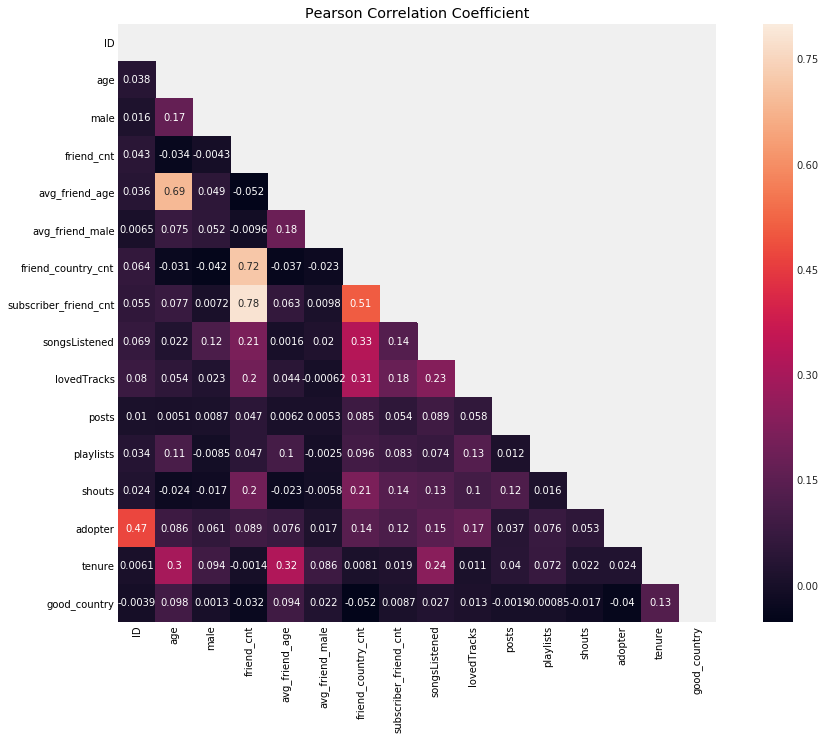

In [85]:
corr_matrix = data.corr(method ='pearson')
mask = np.zeros_like(corr_matrix)
plt.figure(figsize=(15,11))
plt.title('Pearson Correlation Coefficient')
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr_matrix, mask=mask, vmax=.8, square=True, annot=True)

- Avg Friend Age and Age of User are highly correlated (0.69) which makes sense since most people have friends the same age as them
- Subscriber friend count and friend count as also highly correlated (0.78). This could mean that those who are friends with subscribers might be influenced to become paying users as well (if they aren't paying currently)

# Visualizations

Comparison of Male to Female Users

([<matplotlib.axis.XTick at 0x20881047710>,
 <a list of 2 Text xticklabel objects>)

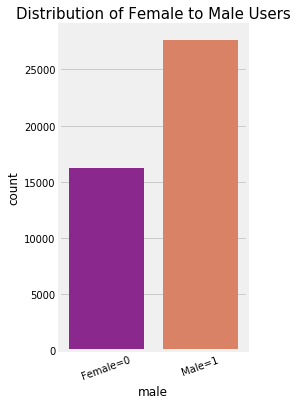

In [10]:
sns.countplot(data['male'], palette="plasma")
users = plt.gcf()
users.set_size_inches(3,6)
plt.title('Distribution of Female to Male Users', fontsize='15')
plt.xticks(rotation='vertical',fontsize='10')
plt.xticks(np.arange(0, 1, step=0.2))  # Set label locations
plt.xticks(np.arange(2), ['Female', 'Male'])  # Set text labels
plt.xticks([0, 1], ['Female=0', 'Male=1'], rotation=20)  # Set text labels and properties

- There are roughly 16,000 Female Users and over 25,000 Male Users
- Females only make up 37% of the Total Number of Users on High Note

Comparison of Free (adopter=0) and Premium Users (adopter=1)

([<matplotlib.axis.XTick at 0x208813e1358>,
 <a list of 2 Text xticklabel objects>)

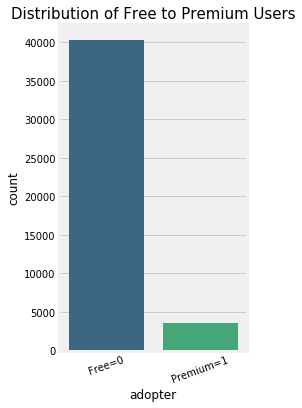

In [17]:
sns.countplot(data['adopter'], palette="viridis")
users = plt.gcf()
users.set_size_inches(3,6)
plt.title('Distribution of Free to Premium Users', fontsize='15')
plt.xticks(rotation='vertical',fontsize='10')
plt.xticks(np.arange(0, 1, step=0.2))  # Set label locations
plt.xticks(np.arange(2), ['Free', 'Premium'])  # Set text labels
plt.xticks([0, 1], ['Free=0', 'Premium=1'], rotation=20)  # Set text labels and properties

There are significantly more Free users than Premium Paying Users on High Note.
We need to find out what variables influence users to shift from not paying to paying for the services offered on the streaming service.
There are a lot of articles and research conducted which show that peer influence and user engagement can affect users’ decisions to pay for a premium subscription. 

The goal of this analysis is to use High Note's data in order to predict user's decision to buy using variables that fall under 'peer influence' and user engagement.' The results will quantify the effect of social engagement on revenue, as well as how valuable a premium subscriber can be in a freemium social community. 

Data Distribution of Certain Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002088100B470>,
      dtype=object)

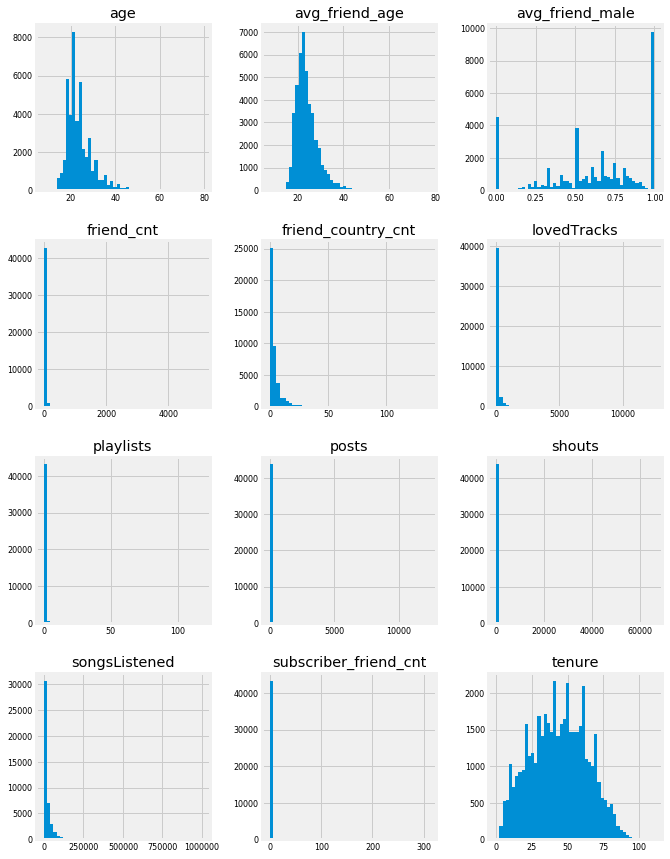

In [13]:
df = data.iloc[:,[1,3,4,5,6,7,8,9,10,11,12,14]] 
df.hist(figsize=(10, 15), bins=50, xlabelsize=8, ylabelsize=8)

age, avg_friend_age, friend_country_cnt, and songListened are all right skewed

Using a scatterplot we can try to see any patterns between Adopters and all the variables

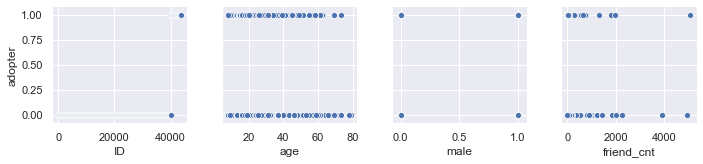

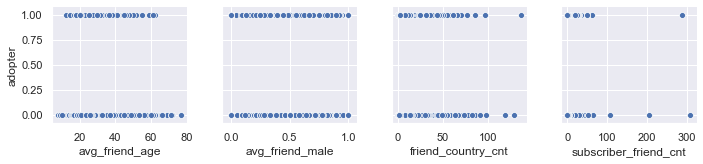

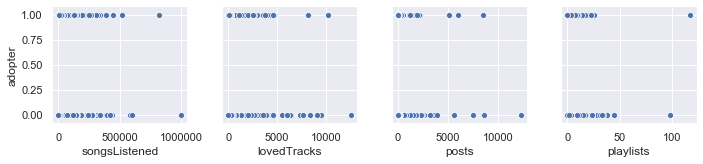

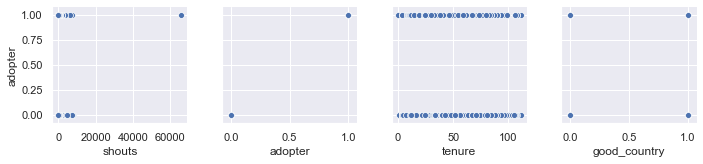

In [18]:
sns.set(color_codes=True)
for i in range(0, len(data.columns), 4):
    sns.pairplot(data=data,
                x_vars=data.columns[i:i+4],
                y_vars=['adopter'])

# Premium Users Analysis

In [3]:
premium= data[data['adopter']==1]
premium.head()

,ID,age,male,friend_cnt,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songsListened,lovedTracks,posts,playlists,shouts,adopter,tenure,good_country
40300,40301,27,1,7,26.000000,0.750000,1,0,52984,351,15,14,9,1,64,0
40301,40302,31,1,37,26.233333,0.594595,4,5,37677,567,0,2,4,1,63,0
40302,40303,22,1,90,22.318182,0.473684,21,2,68217,787,0,1,53,1,39,0
40303,40304,34,0,9,36.857143,0.875000,5,1,13439,34,0,0,6,1,69,0
40304,40305,31,1,15,27.333333,0.307692,2,2,48713,15,3,0,20,1,79,0


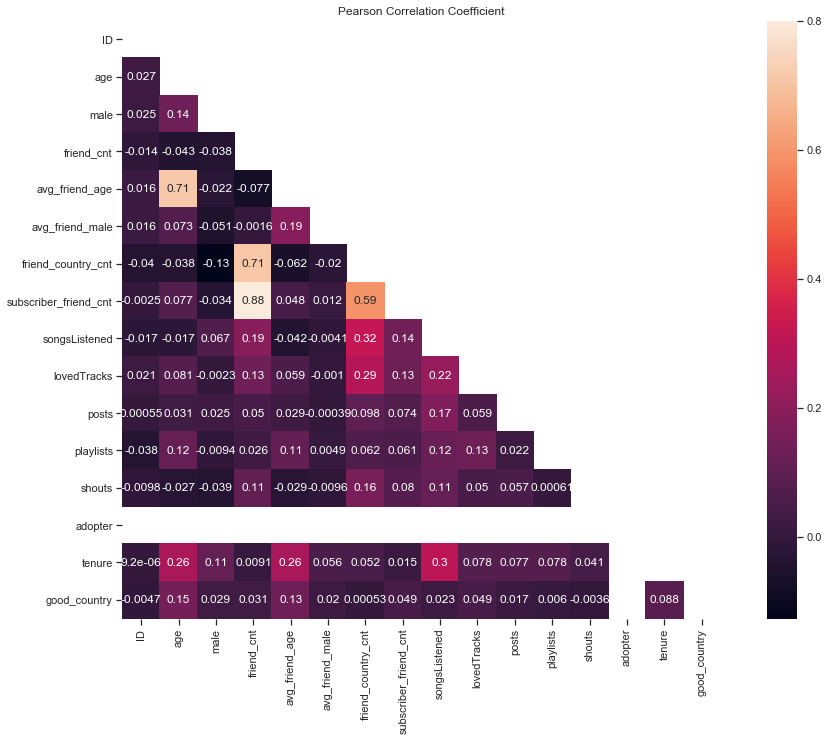

In [27]:
#Seeing if there is any correlation b/w premium users (adopter=1) and the variables 
corr_matrix = premium.corr(method ='pearson')
mask = np.zeros_like(corr_matrix)
plt.figure(figsize=(15,11))
plt.title('Pearson Correlation Coefficient')
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr_matrix, mask=mask, vmax=.8, square=True, annot=True)

Highly correlated variables for premium users include: 
- avg_friend_age and age
- friend_country_cnt  and friend_cnt
- subscriber_friend_cnt and friend_cnt
these variables relate to demographics (country, age) as well as peer influence (friends)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000203FC527D30>,
      dtype=object)

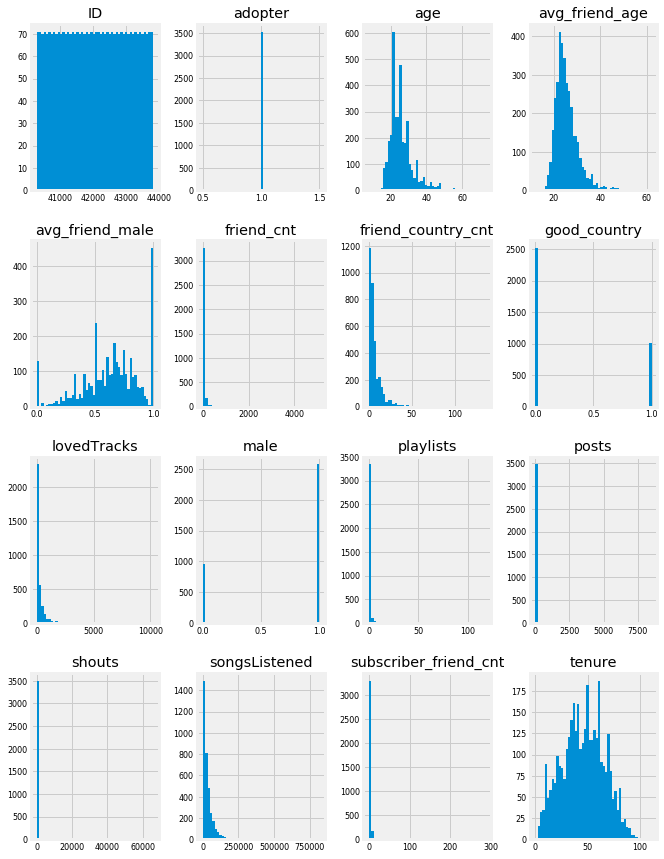

In [5]:
premium.hist(figsize=(10, 15), bins=50, xlabelsize=8, ylabelsize=8)

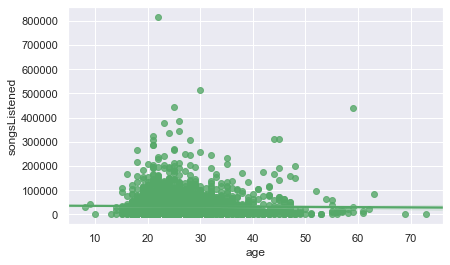

In [9]:
#Relationship between # of Songs listened to and age of premium users
sns.set(color_codes=True)
ax = sns.regplot(x="age", y="songsListened", data=premium, color='g')

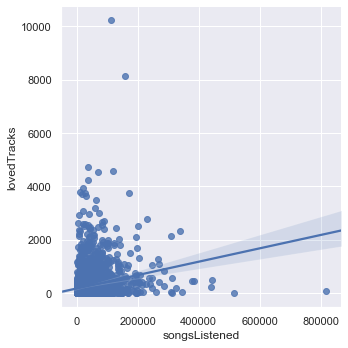

In [12]:
#Relationship between # of Songs listened to and how many were liked for premium users
sns.lmplot(x='songsListened', y='lovedTracks', data=premium)

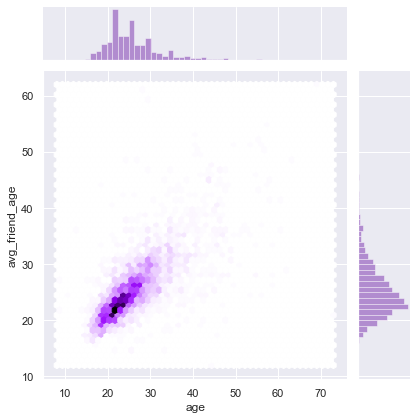

In [20]:
#Relationship between Age and avg friend age for premium users
sns.set(style="darkgrid")
sns.jointplot(x='age', y='avg_friend_age', data=premium, kind="hex", color="#5D009B")

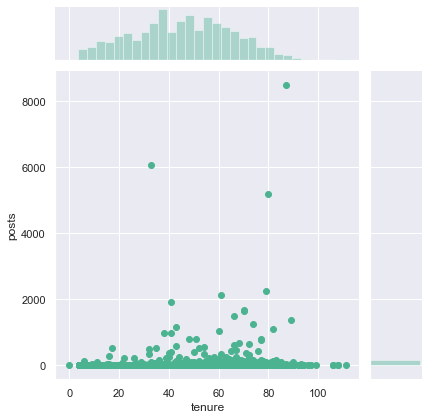

In [14]:
#Relationship between tenure and posts for premium users - not a lot of activity
sns.set(style="darkgrid")
sns.jointplot(x='tenure', y='posts', data=premium, color="#4CB391")

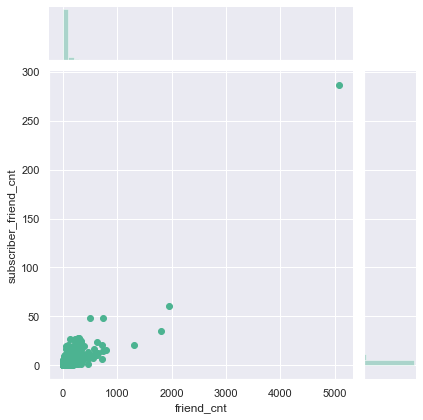

In [19]:
#Relationship between friend count and friends who are subscribers for premium users
sns.set(style="darkgrid")
sns.jointplot(x='friend_cnt', y='subscriber_friend_cnt', data=premium, color="#4CB391")

*Social Engagement* 
- songsListened = cumulative number of songs listened till the beginning of the current period
- lovedTracks = number of tracks loved at the start of CURRENT period
- posts = number of Q&A forum posts made at the start of CURRENT period
- playlists = number of playlists made till the current period

*Peer Influence*
- subscriber_friend_cnt = number of friends who are premium
- shouts = number of shouts received from other users till the current period
- adopter = 1 if the user switched from being FREE to PREMIUM subscriber in CURRENT period (never been premium before)

*Demographics*
- tenure = how long has the user been on the site (in months)
- good_country = 1 if from US, UK or Germany, otherwise rest of the world

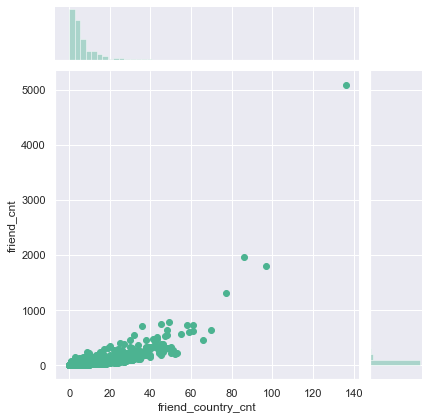

In [5]:
#Relationship between friend count and friends from different countries who are subscribers for premium users
sns.set(style="darkgrid")
sns.jointplot(x='friend_country_cnt', y='friend_cnt', data=premium, color="#4CB391")

Premium users have a lot of friends who come from different countries- this can expose them to a lot of different music. The most coming from 140 different countries

(array([0, 1]), <a list of 2 Text xticklabel objects>)

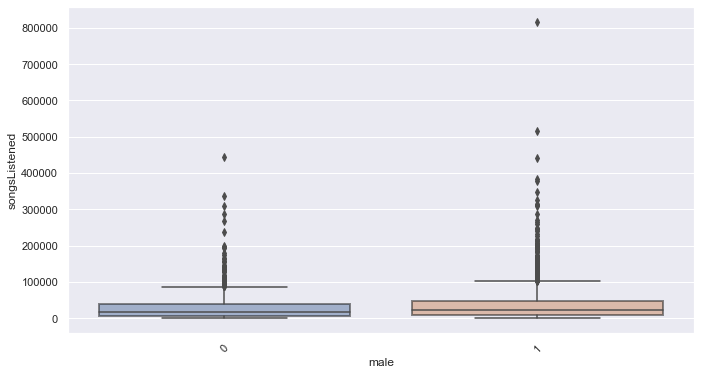

In [10]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='male', y='songsListened', data=premium)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

Here we can see that there are more outliers for those who are males and listen to songs; but both males and females have a lot of engagement on high note where they listen to a lot of songs

# Free Users Analysis

In [6]:
free= data[data['adopter']==0]
free.head()

,ID,age,male,friend_cnt,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songsListened,lovedTracks,posts,playlists,shouts,adopter,tenure,good_country
0,1,22,0,8,22.571429,0.428571,1,0,9687,194,0,1,8,0,59,1
1,2,35,0,2,28.000000,1.000000,2,0,0,0,0,0,0,0,35,0
2,3,27,1,2,23.000000,1.000000,1,0,508,0,0,1,2,0,42,0
3,4,21,0,28,22.947368,0.500000,7,1,1357,32,0,0,1,0,25,0
4,5,24,0,65,22.283019,0.913793,9,0,89984,20,2,0,81,0,67,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018FE75D5278>,
      dtype=object)

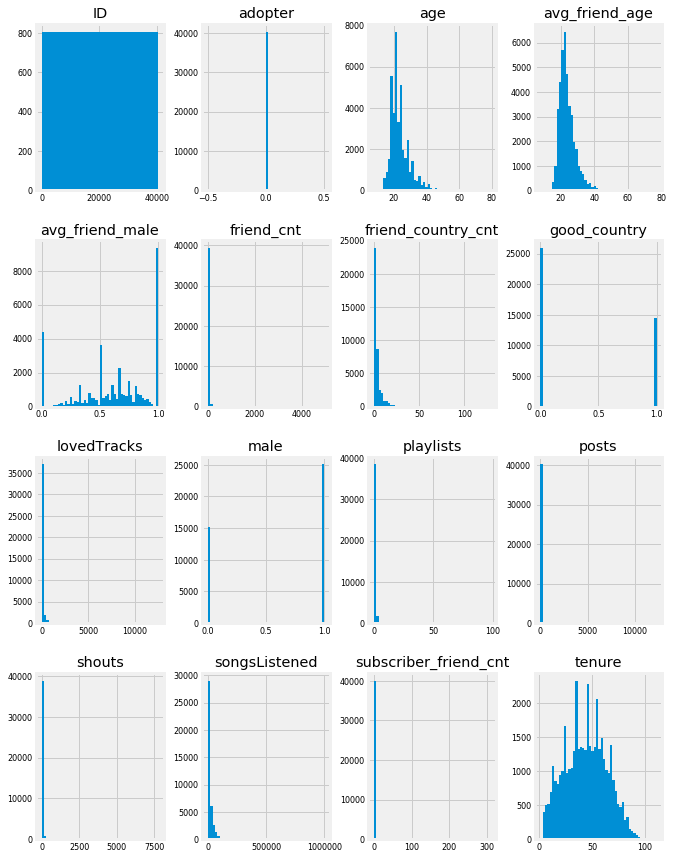

In [5]:
free.hist(figsize=(10, 15), bins=50, xlabelsize=8, ylabelsize=8)

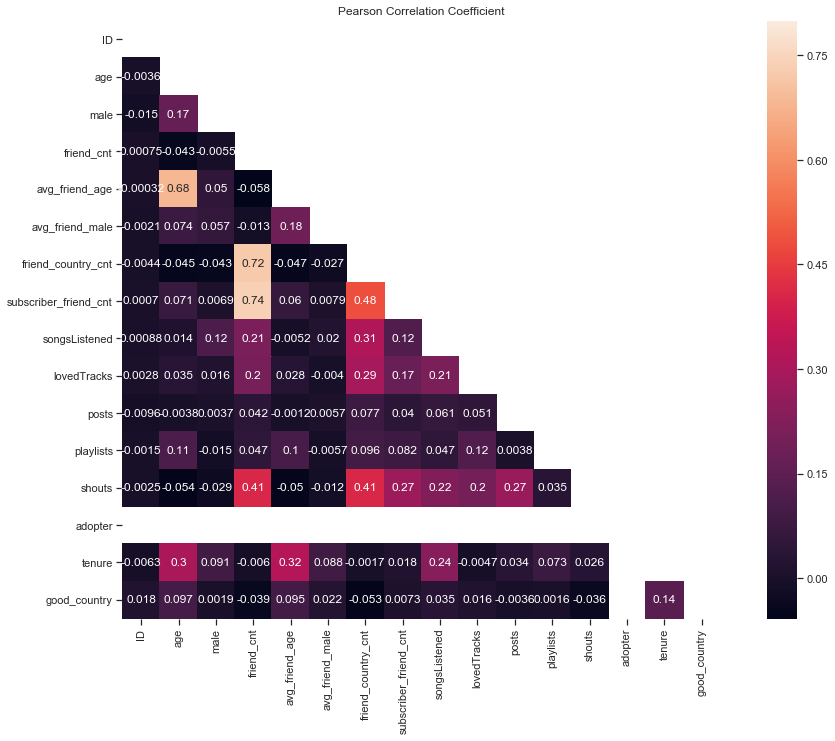

In [30]:
#Seeing if there is any correlation b/w free users (adopter=0) and the variables 
corr_matrix = free.corr(method ='pearson')
mask = np.zeros_like(corr_matrix)
plt.figure(figsize=(15,11))
plt.title('Pearson Correlation Coefficient')
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr_matrix, mask=mask, vmax=.8, square=True, annot=True)

Highly correlated variables for free users include: 
- avg_friend_age and age
- friend_country_cnt  and friend_cnt
- subscriber_friend_cnt and friend_cnt

these variables relate to demographics (country, age) as well as peer influence (friends)

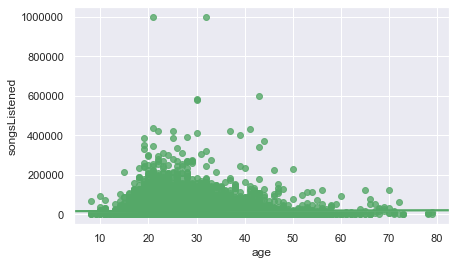

In [32]:
#Relationship between # of Songs listened to and age of free users
sns.set(color_codes=True)
ax = sns.regplot(x="age", y="songsListened", data=free, color='g')

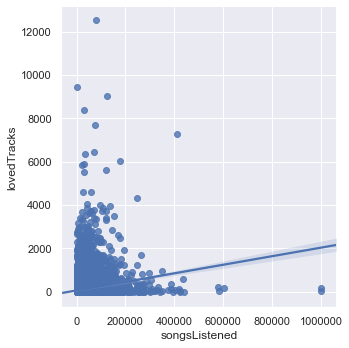

In [36]:
#Relationship between # of Songs listened to and how many were liked for free users
sns.lmplot(x='songsListened', y='lovedTracks', data=free)

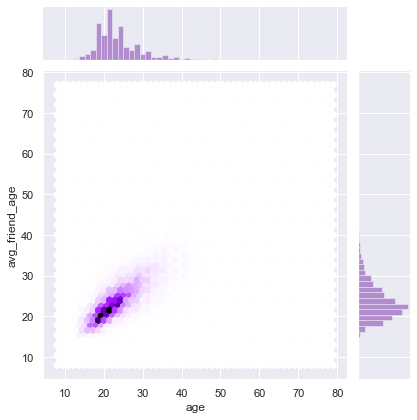

In [21]:
#Relationship between Age and avg friend age for free users
sns.set(style="darkgrid")
sns.jointplot(x='age', y='avg_friend_age', data=free, kind="hex", color="#5D009B")

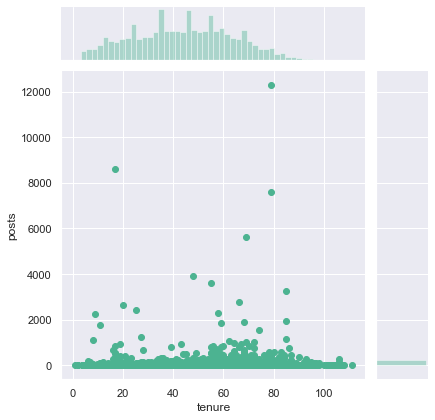

In [22]:
#Relationship between tenure and posts for free users - not a lot of activity as well
sns.set(style="darkgrid")
sns.jointplot(x='tenure', y='posts', data=free, color="#4CB391")

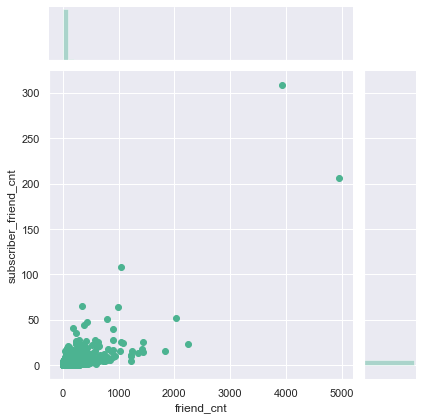

In [8]:
#Relationship between friend count and friends who are subscribers for free users
sns.set(style="darkgrid")
sns.jointplot(x='friend_cnt', y='subscriber_friend_cnt', data=free, color="#4CB391")

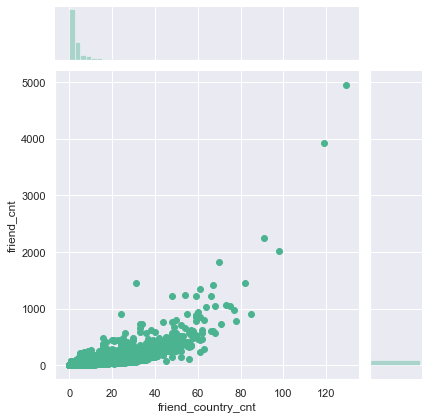

In [9]:
#Relationship between friend count and friends from different countries who are subscribers for free users
#There seems to be an increasing linear model for friend count and number of countries that friends come from; with a max of 120
sns.set(style="darkgrid")
sns.jointplot(x='friend_country_cnt', y='friend_cnt', data=free, color="#4CB391")

# Analyzing Difference in Mean Values for Variables

In [18]:
premium.describe()

,ID,age,male,friend_cnt,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songsListened,lovedTracks,posts,playlists,shouts,adopter,tenure,good_country
count,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.0,3527.000000,3527.000000
mean,42064.000000,25.979870,0.729232,39.733768,25.441309,0.636598,7.188829,1.636802,33758.040544,264.340800,21.200454,0.900766,99.439750,1.0,45.583215,0.287496
std,1018.301527,6.843597,0.444420,117.274896,5.209021,0.250288,8.859818,5.849981,43592.727540,491.426757,221.993445,2.563392,1156.073131,0.0,20.043765,0.452659
min,40301.000000,8.000000,0.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,41182.500000,21.000000,0.000000,7.000000,22.070197,0.500000,2.000000,0.000000,7804.500000,30.000000,0.000000,0.000000,2.000000,1.0,32.000000,0.000000
50%,42064.000000,24.000000,1.000000,16.000000,24.360000,0.666667,4.000000,0.000000,20908.000000,108.000000,0.000000,1.000000,9.000000,1.0,46.000000,0.000000
75%,42945.500000,29.000000,1.000000,40.000000,27.636364,0.812500,9.000000,2.000000,43989.500000,292.000000,2.000000,1.000000,41.000000,1.0,60.000000,1.000000
max,43827.000000,73.000000,1.000000,5089.000000,62.000000,1.000000,136.000000,287.000000,817290.000000,10220.000000,8506.000000,118.000000,65872.000000,1.0,111.000000,1.000000


In [19]:
free.describe()

,ID,age,male,friend_cnt,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songsListened,lovedTracks,posts,playlists,shouts,adopter,tenure,good_country
count,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.0,40300.000000,40300.000000
mean,20150.500000,23.948437,0.621861,18.491663,24.011418,0.616589,3.957891,0.417469,17589.441514,86.822630,5.293002,0.549280,29.972655,0.0,43.809926,0.357792
std,11633.752261,6.371831,0.484929,57.481170,5.104109,0.318985,5.764167,2.418151,28416.022927,263.580442,104.309430,1.071956,150.689789,0.0,19.788865,0.479356
min,1.000000,8.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
25%,10075.750000,20.000000,0.000000,3.000000,20.666667,0.428571,1.000000,0.000000,1252.000000,1.000000,0.000000,0.000000,1.000000,0.0,29.000000,0.000000
50%,20150.500000,23.000000,1.000000,7.000000,23.000000,0.666667,2.000000,0.000000,7440.000000,14.000000,0.000000,0.000000,4.000000,0.0,44.000000,0.000000
75%,30225.250000,26.000000,1.000000,18.000000,26.056373,0.900000,4.000000,0.000000,22892.750000,72.000000,0.000000,1.000000,15.000000,0.0,59.000000,1.000000
max,40300.000000,79.000000,1.000000,4957.000000,77.000000,1.000000,129.000000,309.000000,1000000.000000,12522.000000,12309.000000,98.000000,7736.000000,0.0,111.000000,1.000000


- Free users and premium users have similar distribution in terms of age where the median age was 24 for premium users and 23 for free users and the standard deviation was ~6
- Those who were premium users had a max of 5089 friends while free users was less with a max of 4957 friends 
    - The median number of friends for premium users was also higher (16) than free users (7)
- However, it is interesting to note that free users had more friends who paid for the service (premium users) than premium users
- When looking at the 2 correlation matrices for premium (adopter =1) and free (adopter =0), there is higher positive correlation b/w subscriber friends and friend count for those who are premium users - so as premium users have more friends, those friends are more likely to be paying users than free. For free users there is also a high correlation between these 2 variables
    - this is important to note for further analysis since this could be an influencing factor for free users to become paying users (peer influence)


In [21]:
stats.ttest_ind(premium, free)

Ttest_indResult(statistic=array([111.82647357,  18.04497091,  12.69132964,  18.79014859,
        15.92733647,   3.62887492,  30.30320448,  24.35291868,
        30.77151112,  35.02394494,   7.66454318,  15.89767633,
        11.0398395 ,          inf,   5.09789225,  -8.38786   ]), pvalue=array([0.00000000e+000, 1.58327018e-072, 7.67034159e-037, 1.85184466e-078,
       5.91901346e-057, 2.84982612e-004, 1.20769063e-199, 3.97026492e-130,
       9.86458912e-206, 4.50297889e-265, 1.83155397e-014, 9.48076104e-057,
       2.67506131e-028, 0.00000000e+000, 3.44882238e-007, 5.09640594e-017]))